In [1]:
%matplotlib inline

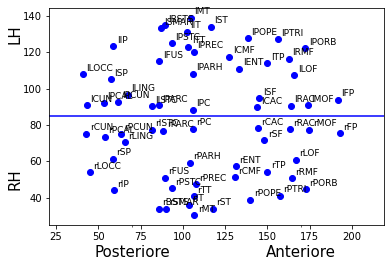

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable



centers=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=None, usecols=(1,2,3))
labels=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=str, usecols=(0))

ax = plt.gca()
#fig = plt.figure(figsize=(5,5), dpi=100)
#ax = fig.add_subplot()#projection='3d')
centers=centers.transpose()
for i,label in enumerate(labels):
    plt.scatter(centers[0,i],centers[1,i], marker='o', color='blue')
    #print(label)
    plt.text(centers[0,i]+2,centers[1,i]+2, label, size=9)

ax.yaxis.set_minor_locator(mticker.FixedLocator((130, 50)))
ax.yaxis.set_minor_formatter(mticker.FixedFormatter(("LH", "RH")))
ax.xaxis.set_minor_locator(mticker.FixedLocator((70, 170)))
ax.xaxis.set_minor_formatter(mticker.FixedFormatter(("Posteriore", "Anteriore")))


plt.setp(ax.yaxis.get_minorticklabels(), rotation=90, size=15, va="center")
ax.tick_params("y",which="minor",pad=25, left=False)
plt.setp(ax.xaxis.get_minorticklabels(), size=15, va="center")
ax.tick_params("x",which="minor",pad=25, left=False)

plt.axline((30,85),(210,85), color='blue')

#ax.set_title("3D plot delle posizioni dei ROI")
plt.savefig("2d_roi.pdf")
plt.show()




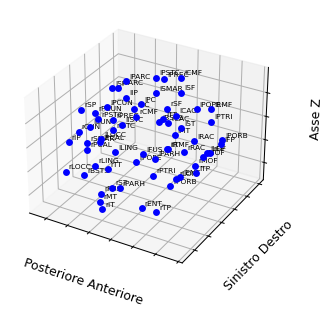

In [3]:
centers=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=None, usecols=(1,2,3))
labels=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=str, usecols=(0))

fig = plt.figure(dpi=90)
ax = fig.add_subplot(projection='3d')
centers=centers.transpose()
for i,label in enumerate(labels):
    ax.scatter(centers[0,i],centers[1,i],centers[2,i], marker='o', color='blue')
    ax.text(centers[0,i]+2,centers[1,i]+2,centers[2,i]+2, label, size=6)
ax.set_xlabel("Posteriore Anteriore")
ax.set_ylabel("Sinistro Destro")
ax.set_zlabel("Asse Z")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.savefig('3d_roi_66.pdf',facecolor='white')
plt.show()

<Figure size 540x360 with 0 Axes>

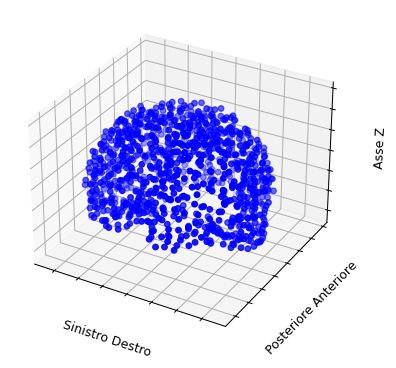

In [4]:
plt.figure(dpi=90)
centers=np.loadtxt("../../Data/Hagmann/group_mean_region_xyz_centers_file.txt")
fig = plt.figure(figsize=(5,5), dpi=90)
ax = fig.add_subplot(projection='3d')
centers=centers.transpose()
ax.scatter(centers[0],centers[1],centers[2], marker='o', color='blue')

ax.set_ylabel("Posteriore Anteriore")
ax.set_xlabel("Sinistro Destro")
ax.set_zlabel("Asse Z")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.savefig('3d_roi_998.pdf',facecolor='white')
plt.show()

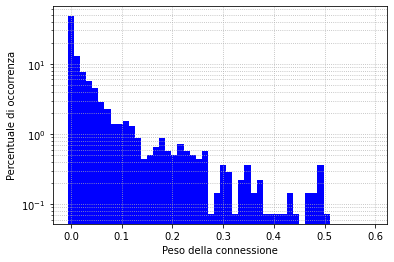

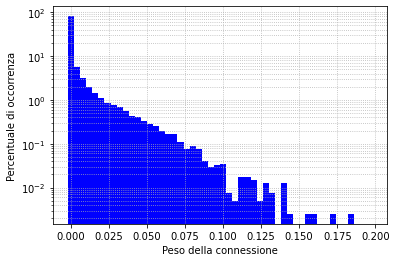

In [8]:
W66 = np.loadtxt("../../Data/connectivity_matrix/weights.txt")
W998 = np.loadtxt(
    "../../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")

w66_0=W66[W66!=0].flatten()
w998_0=W998[W998!=0].flatten()

#plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
hist,bins=np.histogram(w66_0, bins=50, range=(0,0.6))
#plt.title('Distribuzione dei pesi per i due connettomi')
plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum()*100, width=(bins[1]-bins[0]), log=True, color='blue')
#plt.hist(w66_0, bins=50, histtype='step', density=True, range=(0,0.6), align='left')

plt.xlabel("Peso della connessione")
plt.ylabel("Percentuale di occorrenza")

#plt.subplot(1, 2, 2)
#plt.hist(w66_reduced, log=True, bins=50, range=(0, 0.6), density=True,
#         histtype='step', label='w66_r vmax=%.2f' % w66_reduced.max())
#plt.hist(w998_reduced, log=True, bins=50, range=(0, 0.6), density=True,
#         histtype='step', label='w998_r vmax=%.2f' % w998_reduced.max())
#plt.legend()
#plt.title('Distribution of weights\nreduced connectome')
plt.grid(True, which="both", linestyle='dotted')

plt.savefig("../../Figure/distribuzione_pesi_connettomi_66.pdf", dpi=120)
plt.show()




hist, bins =np.histogram(w998_0, bins=50, range=(w998_0.min(), 0.2), density=True)
plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum()*100, width=(bins[1]-bins[0]), log=True, color='blue')

plt.xlabel("Peso della connessione")
plt.ylabel("Percentuale di occorrenza")
plt.grid(True, which="both", linestyle='dotted')

plt.savefig("../../Figure/distribuzione_pesi_connettomi_998.pdf", dpi=120)
plt.show()

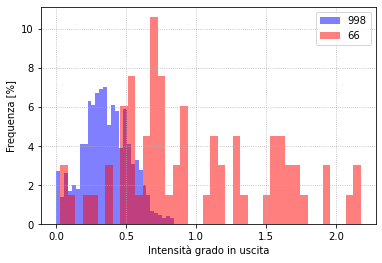

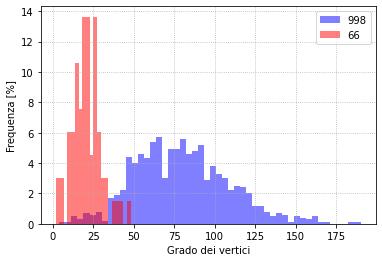

In [9]:
hist998, bins998 =np.histogram(W998.sum(axis=0), bins=30, density=True)
hist66, bins66 =np.histogram(W66.sum(axis=0), bins=40, density=True)
hist998_, bins998_ =np.histogram(np.count_nonzero(W998, axis=0), bins=50, density=True)
hist66_, bins66_ =np.histogram(np.count_nonzero(W66, axis=0), bins=20, density=True)


#plt.legend()
#plt.ylabel('Frequenza [%]')
#plt.xlabel('Intensità grado in uscita')
#plt.show()

plt.ylabel('Frequenza [%]')
plt.xlabel('Intensità grado in uscita')
plt.bar(bins998[:-1], hist998.astype(np.float32) / hist998.sum()*100, width=(bins998[1]-bins998[0]), color='blue', align='edge', label='998', alpha=0.5)
plt.bar(bins66[:-1], hist66.astype(np.float32) / hist66.sum()*100, width=(bins66[1]-bins66[0]), color='red', align='edge', label='66', alpha=0.5)

plt.legend()
plt.grid(True, which="both", linestyle='dotted')
plt.savefig('../../Figure/hist_out_deg_intensity.pdf')
plt.show()


plt.bar(bins998_[:-1], hist998_.astype(np.float32) / hist998_.sum()*100, width=(bins998_[1]-bins998_[0]), color='blue', align='edge', label='998', alpha=0.5)
#plt.legend()
#plt.ylabel('Frequenza [%]')
#plt.xlabel('Grado dei vertici')
#plt.show()

plt.bar(bins66_[:-1], hist66_.astype(np.float32) / hist66_.sum()*100, width=(bins66_[1]-bins66_[0]), color='red', align='edge', label='66',alpha=0.5)
plt.legend()
plt.ylabel('Frequenza [%]')
plt.xlabel('Grado dei vertici')
plt.grid(True, which="both", linestyle='dotted')

plt.savefig('../../Figure/hist_out_deg_number.pdf')

plt.show()

#plt.hist(W.sum(axis=0),30)
#plt.set_ylabel("Frequency")
#plt.set_xlabel("Sum of input weights")

#ax[1].hist(W.sum(axis=1),30)
#ax[1].set_title("Histogram of in-degree sum")
#ax[1].set_ylabel("Frequency")
#ax[1].set_xlabel("Sum of input weights")

#ax[2].hist(np.count_nonzero(W, axis=0),30)
#ax[2].set_title("Non-zero-weight connections")
#ax[2].set_xlabel("Zeros connections")
#plt.show()



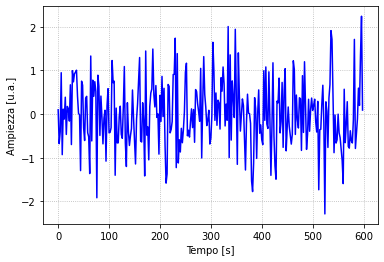

In [10]:
signal=np.loadtxt("../../Data/fMRI/subj1_block1.txt")
labels_ponce=np.loadtxt('../../Data/fMRI/ROIs_Labels.txt',dtype=str)
t=np.arange(300)/0.5
plt.plot(t,signal[:,0], color='blue')
plt.xlabel('Tempo [s]')
plt.ylabel('Ampiezza [u.a.]')
#plt.xlim(0,40)
plt.grid(True, which="both", linestyle='dotted')

plt.savefig("../../Figure/fmri_1.pdf")
plt.show()

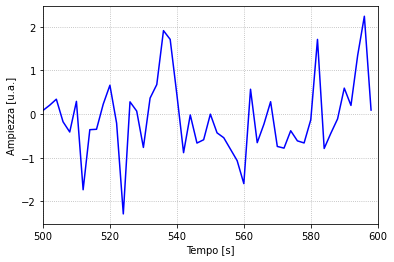

In [11]:
signal=np.loadtxt("../../Data/fMRI/subj1_block1.txt")
labels_ponce=np.loadtxt('../../Data/fMRI/ROIs_Labels.txt',dtype=str)
t=np.arange(300)/0.5
plt.plot(t,signal[:,0], color='blue')
plt.xlabel('Tempo [s]')
plt.ylabel('Ampiezza [u.a.]')
plt.xlim(500,600)
plt.grid(True, which="both", linestyle='dotted')

plt.savefig("../../Figure/fmri_1_zoom.pdf")
plt.show()

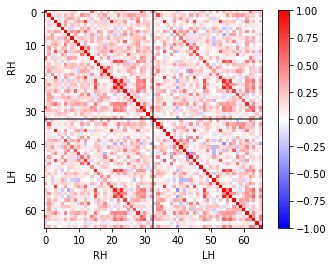

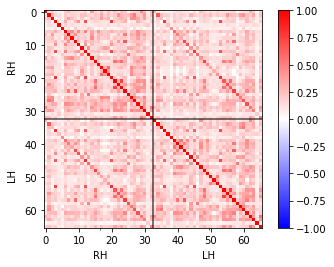

In [12]:
labels_hagmann=np.loadtxt("../../Data/connectivity_matrix/centres.txt", dtype=str, usecols=0)
dic_hagmann={v:i for i,v in enumerate(labels_hagmann)}
dic_ponce={v:i for i,v in enumerate(labels_ponce)}

new_order_ponce=[dic_ponce[i] for i in labels_hagmann]
#new_order_hagmann=[dic_hagmann[i] for i in labels_ponce]


signal_new=np.zeros(signal.shape)
for i in range(66):
    signal_new[:,i]=signal[:,new_order_ponce[i]]


plt.imshow(np.corrcoef(signal_new, rowvar=False), cmap='bwr')
plt.clim(-1,1)
plt.colorbar()
plt.axvline(x=32.5, color='black', alpha=0.7)
plt.axhline(y=32.5, color='black', alpha=0.7)
ax = plt.gca()

ax.yaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.yaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))
ax.xaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.xaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))

plt.setp(ax.yaxis.get_minorticklabels(), rotation=90, va="center")
ax.tick_params("y",which="minor",pad=25, left=False)
plt.setp(ax.xaxis.get_minorticklabels(), va="center")
ax.tick_params("x",which="minor",pad=25, left=False)
plt.savefig('../../Figure/fc_1.pdf')
plt.show()


#print(new_order_ponce)
#print(new_order_hagmann)
#signal[:,dic_ponce['rBSTS']]==signal_new[:,0]

# Load data from specific subject
# Choose to read both blocks or not
def fmri_signal(subject=1, all_blocks=False):
    if all_blocks==True:
        a=np.loadtxt("../../Data/fMRI/subj"+str(subject)+"_block1.txt")
        a_n=np.zeros(a.shape)
        b=np.loadtxt("../../Data/fMRI/subj"+str(subject)+"_block2.txt")
        b_n=np.zeros(b.shape)
        for i in range(66):
            a_n[:,i]=a[:, new_order_ponce[i]]
            b_n[:,i]=b[:,new_order_ponce[i]]
        return np.concatenate((a_n,b_n))
    elif all_blocks==False:
        a=np.loadtxt("../../Data/fMRI/subj"+str(subject)+"_block1.txt")
        a_n=np.zeros(a.shape)
        for i in range(66):
            a_n[:,i]=a[:, new_order_ponce[i]]
        return a_n

#Compute FC for all subjects
correlations=np.zeros((24,66,66), dtype=np.float64)
for subj in range(1,25,1):
    correlations[subj-1]=np.corrcoef(fmri_signal(subj, all_blocks=True), rowvar=False)

#Take the mean of all 24 FC matrix
corr=np.mean(correlations, axis=0)

plt.imshow(corr, cmap='bwr')
plt.clim(-1,1)
plt.colorbar()
plt.axvline(x=32.5, color='black', alpha=0.7)
plt.axhline(y=32.5, color='black', alpha=0.7)
ax = plt.gca()

ax.yaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.yaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))
ax.xaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.xaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))

plt.setp(ax.yaxis.get_minorticklabels(), rotation=90, va="center")
ax.tick_params("y",which="minor",pad=25, left=False)
plt.setp(ax.xaxis.get_minorticklabels(), va="center")
ax.tick_params("x",which="minor",pad=25, left=False)
plt.savefig('../../Figure/fc_all.pdf')
plt.show()

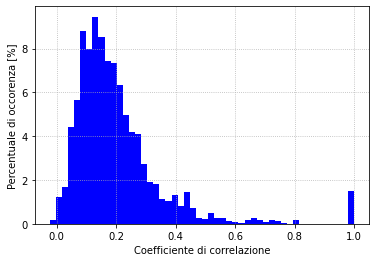

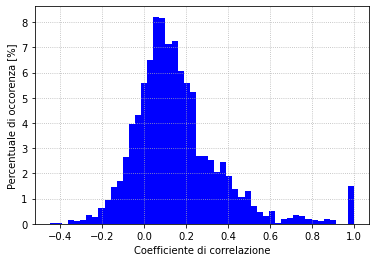

In [14]:
hist, bins =np.histogram(corr.flatten(), bins=50, density=True)
plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum()*100, width=(bins[1]-bins[0]), color='blue', align='edge')
plt.ylabel('Percentuale di occorenza [%]')
plt.xlabel('Coefficiente di correlazione')
plt.grid(True, which="both", linestyle='dotted')

plt.savefig('../../Figure/fc_hist_all.pdf')
plt.show()



hist, bins =np.histogram(np.corrcoef(signal_new, rowvar=False).flatten(), bins=50, density=True)
plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum()*100, width=(bins[1]-bins[0]), color='blue', align='edge')
plt.ylabel('Percentuale di occorenza [%]')
plt.xlabel('Coefficiente di correlazione')
plt.grid(True, which="both", linestyle='dotted')

plt.savefig('../../Figure/fc_hist_1.pdf')
plt.show()


In [ ]:
r1_66=2/66
r2_66=r1_66**(1/5)

r1_998=2/998
r2_998=r1_998**(1/5)

print(W66.sum(axis=0).mean()* r2_66/(1+2*r2_66),W998.sum(axis=0).mean()* r2_998/(1+2*r2_998))